In [10]:
'''
Case Study : CIFAR10
'''

In [3]:
# 汇总需要用到的函数库
import tensorflow as tf
from PIL import Image
from glob import glob
import numpy as np
from keras.utils import to_categorical 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten,Input,Activation,Conv2D,MaxPooling2D,BatchNormalization
from keras import Model

## 读取数据

In [6]:
'''
keras.dateset中提供了CIFAR10数据集
'''
cifar10 = tf.keras.datasets.cifar10
(X0, Y0), (X1, Y1) = cifar10.load_data()

# 将像素点取值标准化到(0,1)区间

X0 = X0/255.0
X1 = X1/255.0

## 可视化

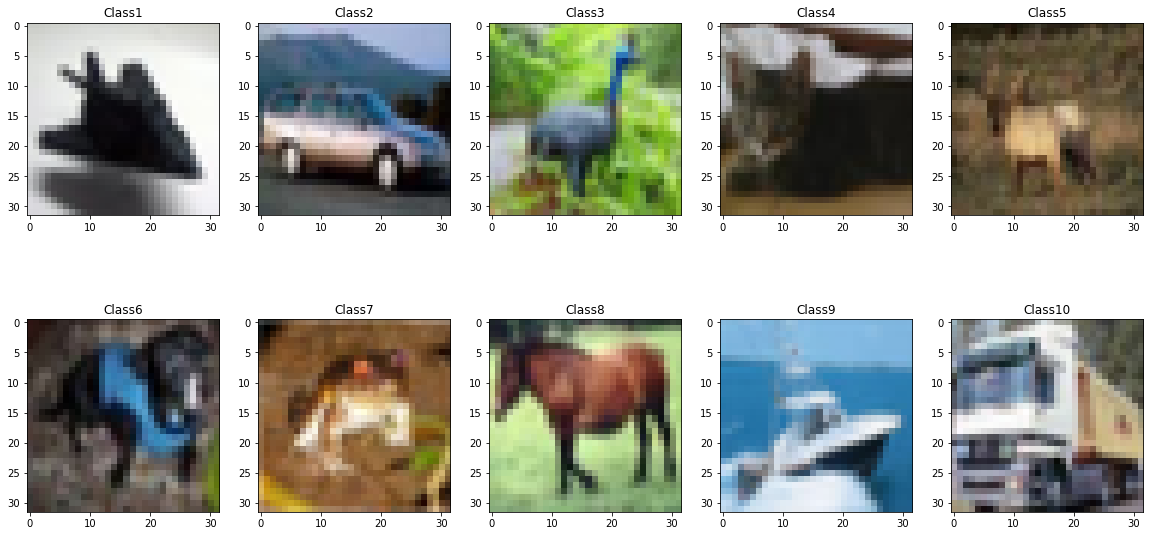

In [24]:
fig,ax=plt.subplots(2,5)
fig.set_figwidth(20)
fig.set_figheight(10)
ax=ax.flatten()
for i in range(len(ax)):
    Im=X0[(Y0==i).reshape(50000,)][0]   # 使用逻辑变量实现条件索引,reshape是因为我们需要逻辑向量是1维。
    ax[i].imshow(Im)
    ax[i].set_title("Class" + str(i+1))

## One-hot 处理

如果不进行one-hot处理，model.compile中的loss需要使用"sparse_categorical_crossentropy"

In [25]:
Y0=to_categorical(Y0)
Y1=to_categorical(Y1)

## 构建CNN模型 

In [26]:
imsize = 32
input_layer=Input([imsize,imsize,3])
x=input_layer
x=Conv2D(100,[2,2],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2])(x) 
x=Conv2D(100,[2,2],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2])(x) 
x=Conv2D(100,[2,2],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2])(x) 
x=Flatten()(x)
x=Dense(10,activation='softmax')(x)
output_layer=x
model=Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 100)       1300      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 100)       40100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 100)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 100)         40100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 100)         0     

## 模型编译及训练 

In [27]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(X0,Y0,validation_data=(X1,Y1),batch_size=100,epochs=10)

Epoch 1/10
500/500 [==============================] - 12s 23ms/step - loss: 1.5673 - accuracy: 0.4379 - val_loss: 1.3120 - val_accuracy: 0.5371
Epoch 2/10
500/500 [==============================] - 11s 23ms/step - loss: 1.1853 - accuracy: 0.5852 - val_loss: 1.0790 - val_accuracy: 0.6224
Epoch 3/10
500/500 [==============================] - 12s 23ms/step - loss: 1.0272 - accuracy: 0.6411 - val_loss: 0.9924 - val_accuracy: 0.6533
Epoch 4/10
500/500 [==============================] - 12s 23ms/step - loss: 0.9350 - accuracy: 0.6780 - val_loss: 0.9641 - val_accuracy: 0.6622
Epoch 5/10
500/500 [==============================] - 12s 24ms/step - loss: 0.8679 - accuracy: 0.6987 - val_loss: 0.9259 - val_accuracy: 0.6765
Epoch 6/10
500/500 [==============================] - 12s 23ms/step - loss: 0.8105 - accuracy: 0.7190 - val_loss: 0.8567 - val_accuracy: 0.7076
Epoch 7/10
500/500 [==============================] - 12s 24ms/step - loss: 0.7740 - accuracy: 0.7337 - val_loss: 0.8525 - val_accuracy: